# Precise Kernel - demo on UCI datasets

In [1]:
import process_results
import json
import numpy as np

2023-07-18 14:42:02.069167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Locate to the directory of run_regression.py
%cd ../..

/Users/mattiarosso/Desktop/Eurecom/SemesterProject/Repository/Sparse-Gaussian-Processes-Revisited


In [3]:
!rm -rf results/run*
!python3 run_regression.py --dataset boston --iterations 1024 --num_posterior_samples 256 --n_layers 1 --precise_kernel 1 --kfold -1 --prior_precision_type laplace --prior_laplace_b 10


### Static Train/Test split ###
INFO:root:Loading dataset from ./data/boston.pth
INFO:root:Number of inducing points: 100
================= DGP
 Input dim = 13
 Output dim = 1
 Depth = 1
 |============ GP Layer 
 | Input dim = 13
 | Output dim = 1
 | Num inducing = 100
 | Prior on inducing positions = normal
 | |======= Kernel: FullPrecisionRBF (param: LLᵀ)
 | | Variance = 0.100
 | | Prior precision type = laplace (b = 10.00)
TRAIN | iter =      1      sample marginal LL = -3.19
TRAIN | iter =    251      sample marginal LL = -5.16
TRAIN | iter =    501      sample marginal LL = -5.26
TRAIN | iter =    751      sample marginal LL = -5.41
TRAIN | iter =   1001      sample marginal LL = -5.22
{'dataset': 'boston',
 'fold': 0,
 'minibatch_size': 404,
 'model': 'bsgp',
 'n_layers': 1,
 'num_inducing': 100,
 'precise_kernel': 1,
 'prior_type': 'normal',
 'test_mnll': 3.619819263978154}


In [4]:
processed_results_kfold = process_results.process_results_kfold(filepath='results/run-0001/BOSTON_ARD.json', precise_kernel=0, d=13, kfold=5)

In [5]:
def convert_numpy_to_list(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_numpy_to_list(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_numpy_to_list(item) for item in obj]
    else:
        return obj
processed_results_kfold_list_version = convert_numpy_to_list(processed_results_kfold)

In [6]:
with open("BOSTON_ARD.json", "w") as outfile:
    json.dump(processed_results_kfold_list_version, outfile)

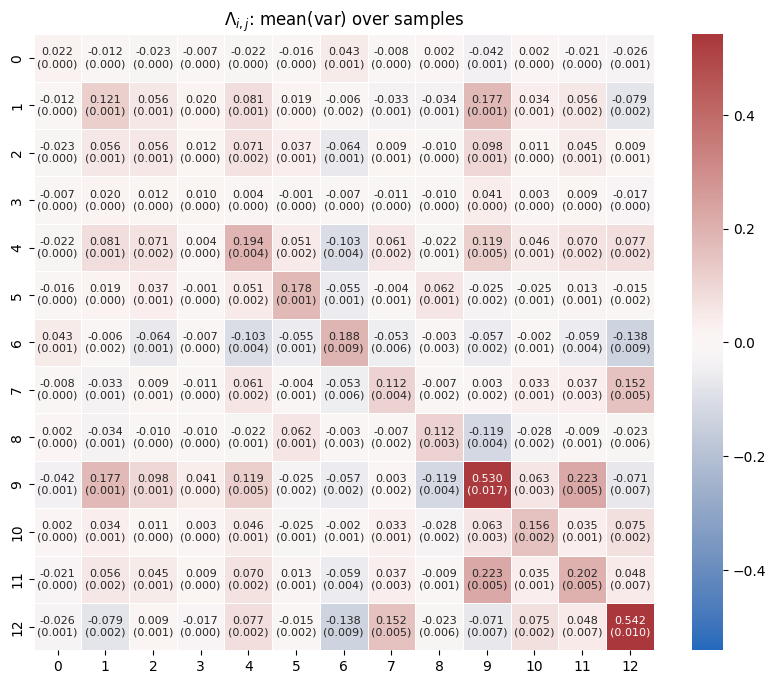

In [38]:
process_results.heatmap_precision(processed_results_kfold['precisions_merged_mean_kfold'][0], processed_results_kfold['precisions_merged_var_kfold'][0], fig_height=8, fig_width=10)

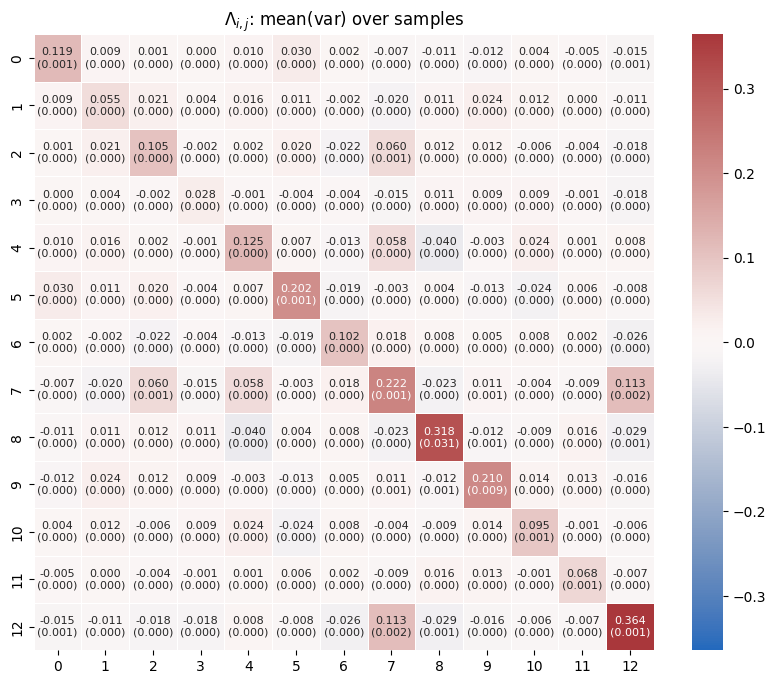

In [23]:
process_results.heatmap_precision(processed_results_kfold['precisions_mean_over_kfold'], processed_results_kfold['precisions_var_over_kfold'], fig_height=8, fig_width=10)

In [6]:
!rm -rf results/run*
!python3 run_regression.py --dataset yacht --iterations 1024 --num_posterior_samples 256 --n_layers 1 --precise_kernel 1 --kfold 3 --prior_precision_type laplace --prior_laplace_b 10

INFO:root:Loading dataset from ./data/yacht.pth

### Training fold: 1/3 ###
INFO:root:Number of inducing points: 100
================= DGP
 Input dim = 6
 Output dim = 1
 Depth = 1
 |============ GP Layer 
 | Input dim = 6
 | Output dim = 1
 | Num inducing = 100
 | Prior on inducing positions = normal
 | |======= Kernel: FullPrecisionRBF (param: LLᵀ)
 | | Variance = 0.100
 | | Prior precision type = laplace (b = 10.00)
TRAIN | iter =      1      sample marginal LL = -2.96
TRAIN | iter =    251      sample marginal LL = -3.15
TRAIN | iter =    501      sample marginal LL = -1.51
TRAIN | iter =    751      sample marginal LL = -0.42
TRAIN | iter =   1001      sample marginal LL = -0.04
Fold 0 - precise kernel: 1 - test MNLL: 0.419

### Training fold: 2/3 ###
INFO:root:Number of inducing points: 100
================= DGP
 Input dim = 6
 Output dim = 1
 Depth = 1
 |============ GP Layer 
 | Input dim = 6
 | Output dim = 1
 | Num inducing = 100
 | Prior on inducing positions = normal
 | |==

In [9]:
precisions_merged_kfold, precisions_merged_mean_kfold, precisions_mean_over_kfold, precisions_merged_var_kfold, precisions_var_over_kfold, posterior_samples_kerlogvar_kfold, test_mnll_kfold = process_results.process_results_kfold(filepath='results/run-0001/LRBF_results.json', kfold=3, precise_kernel=1, invsquare=False, d=6)

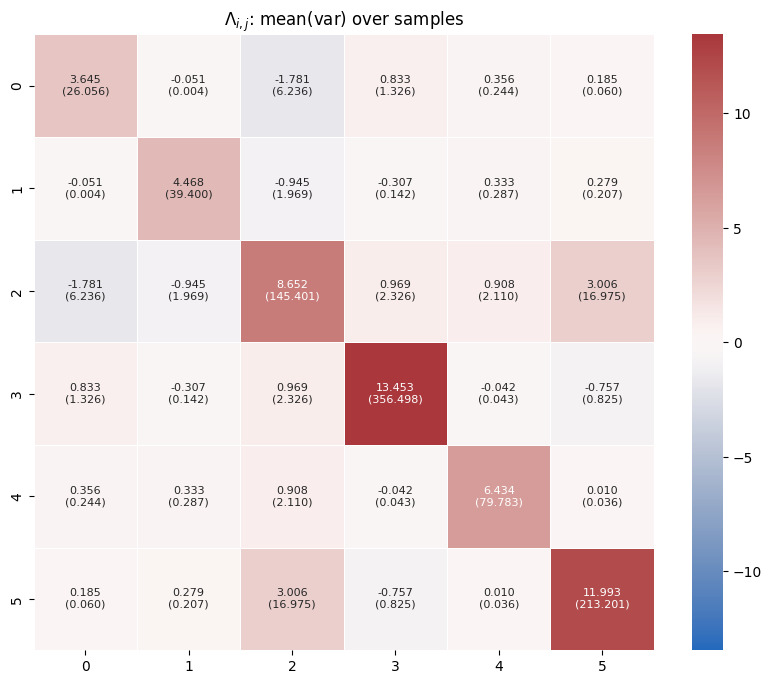

In [11]:
process_results.heatmap_precision(precisions_mean_over_kfold, precisions_var_over_kfold, fig_height=8, fig_width=10)

In [114]:
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
dist = tfp.distributions.Horseshoe(scale=0.1)
lpc = tfp.distributions.Laplace(0, 0.1)

In [119]:
dist.log_prob(1e-8)

<tf.Tensor: shape=(), dtype=float32, numpy=3.7155962>

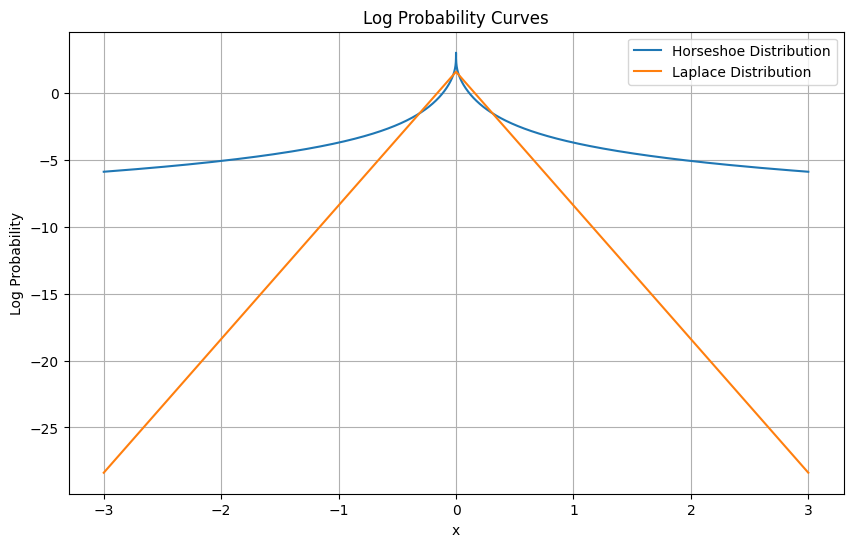

In [121]:
# Step 2: Create x-axis values between -3 and 3
x_values = np.linspace(-3, 3, 100000)

# Step 3: Calculate log probabilities for each x value
log_prob_dist = dist.log_prob(x_values)
log_prob_lpc = lpc.log_prob(x_values)

# Step 4: Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, log_prob_dist, label="Horseshoe Distribution")
plt.plot(x_values, log_prob_lpc, label="Laplace Distribution")
plt.xlabel('x')
plt.ylabel('Log Probability')
plt.title('Log Probability Curves')
plt.legend()
plt.grid()
plt.show()

In [54]:
lpc.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6931472>

In [43]:
K = np.random.rand(3,3)
K = K @ K.T
dist.log_prob(K)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-2.4262938, -1.6845052, -2.3903244],
       [-1.6845052, -1.3501369, -1.7703278],
       [-2.3903244, -1.7703278, -2.5578642]], dtype=float32)>

In [123]:
K

array([[0.        , 0.36222527, 1.22289864],
       [0.36222527, 0.14945088, 0.43677714],
       [1.22289864, 0.43677714, 1.50870567]])